In [529]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
plt.rc('font', size=18)
import warnings
warnings.simplefilter("ignore")

In [530]:
def excel_to_pd(folder_name):
    final_pd = pd.read_excel(f"{folder_name}/Yearly+Statistics+by+Prefecture.xlsx").dropna(thresh=2)
    for i in range(1,30):
        data = pd.read_excel(f"{folder_name}/Yearly+Statistics+by+Prefecture ({i}).xlsx").dropna(thresh=2)
        final_pd = pd.concat([final_pd, data])   
    final_pd = final_pd.set_index('REGION')
    cols_to_convert = final_pd.select_dtypes(include=['string']).columns
    final_pd[cols_to_convert] = final_pd[cols_to_convert].apply(pd.to_numeric, errors='coerce')
    return final_pd

In [531]:
hospital = excel_to_pd("Number of Hospitals")
hospital.name = 'hospital'
hospital

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
REGION,,,,,,,,,,,,,,,,,,,,,
Districts under Beijing,NaN,NaN,NaN,NaN,NaN,713.0,701.0,641.0,631.0,591.0,...,652.0,623.0,605.0,611.0,586.0,602.0,506.0,435.0,428.0,266.0
Beijing,644.0,651.0,664.0,648.0,656.0,713.0,701.0,672.0,647.0,608.0,...,668.0,657.0,645.0,652.0,673.0,674.0,686.0,676.0,673.0,645.0
Districts under Tianjin,NaN,NaN,NaN,NaN,NaN,571.0,661.0,631.0,399.0,385.0,...,379.0,398.0,397.0,384.0,397.0,317.0,241.0,311.0,312.0,233.0
Tianjin,NaN,424.0,441.0,420.0,426.0,571.0,661.0,631.0,482.0,465.0,...,462.0,474.0,485.0,483.0,495.0,488.0,487.0,478.0,483.0,476.0
Shijiazhuang City,NaN,328.0,275.0,256.0,235.0,425.0,393.0,386.0,394.0,395.0,...,339.0,338.0,520.0,502.0,554.0,555.0,568.0,583.0,581.0,581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuzhong City,NaN,NaN,NaN,NaN,NaN,906.0,873.0,830.0,825.0,825.0,...,97.0,95.0,140.0,137.0,196.0,195.0,157.0,185.0,NaN,18.0
Guyuan City,NaN,NaN,NaN,NaN,NaN,109.0,109.0,326.0,300.0,300.0,...,123.0,119.0,154.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN
Zhongwei City,NaN,NaN,NaN,NaN,NaN,64.0,63.0,57.0,57.0,53.0,...,150.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [532]:
land = excel_to_pd("Land Area (10000 sq km)")
land.name = 'land'
land

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
REGION,,,,,,,,,,,,,,,,,,,,,
Districts under Beijing,NaN,1.6410,1.6406,1.6406,1.6411,1.6411,1.2187,1.2187,1.2187,1.2187,...,1.2188,1.2484,1.2484,1.2484,1.2574,0.6496,0.6496,0.5475,0.5475,0.4568
Beijing,NaN,1.6411,1.6411,1.6411,1.6411,1.6411,1.6411,1.6411,1.6411,1.6411,...,1.6400,1.6411,1.6800,1.6800,1.6800,1.6808,1.6808,1.6808,1.6808,1.6808
Districts under Tianjin,NaN,1.1967,1.1760,1.1917,1.1917,1.1917,0.7399,0.7399,0.7399,0.7399,...,0.7418,0.7418,0.7418,0.7418,0.7418,0.5908,0.4335,0.4335,0.4335,0.4335
Tianjin,NaN,1.1966,1.1966,1.1966,1.1966,1.1917,1.1917,1.1917,1.1760,1.1917,...,1.1800,1.1900,1.1920,1.1920,1.1920,1.1920,1.1920,1.1920,1.1920,1.1920
Shijiazhuang City,NaN,1.5848,1.5848,1.4060,1.3056,1.3056,1.3109,1.5848,1.5848,1.5848,...,1.5848,1.5848,1.5848,1.5848,1.5848,1.5848,1.5848,1.5848,1.5848,1.5848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuzhong City,NaN,1.6758,1.6758,1.6758,1.6758,1.6758,1.6757,1.6757,1.6757,2.0700,...,2.0193,2.0193,2.4677,2.3566,2.8370,2.8300,2.8072,2.8072,NaN,0.1112
Guyuan City,NaN,1.0523,1.3047,1.3047,1.3047,1.3047,1.3047,1.3047,1.3047,1.3047,...,1.1286,1.1286,1.6775,1.6775,NaN,NaN,NaN,NaN,NaN,NaN
Zhongwei City,NaN,1.7562,1.7448,1.7448,1.7448,1.7448,1.7448,1.7448,1.7441,1.7441,...,1.6986,1.6986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [533]:
pop = excel_to_pd("Population (10000 people)")
pop.name = 'pop'
pop

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
REGION,,,,,,,,,,,,,,,,,,,,,
Districts under Beijing,1414.0,1395.48,1392.10,1373.70,1359.20,1359.51,1273.69,1261.90,1245.20,1229.08,...,1113.88,1097.56,1084.18,1073.21,1058.72,1044.75,1036.33,1027.87,920.12,737.40
Beijing,1414.0,1395.48,1397.40,1375.80,1359.20,1362.86,1345.20,1333.40,1316.34,1297.46,...,1184.14,1167.76,1154.06,1142.83,1127.89,1113.53,1106.20,1097.76,1092.28,1083.23
Districts under Tianjin,1152.0,1130.68,1105.04,1081.63,1049.99,1044.40,842.28,832.80,821.70,815.62,...,772.72,769.27,763.61,759.10,756.14,751.94,749.67,745.31,593.75,593.12
Tianjin,1152.0,1130.68,1108.18,1081.63,1049.99,1044.40,1026.90,1016.66,1003.97,993.20,...,942.99,938.47,932.16,926.99,923.75,918.71,916.17,910.74,905.11,902.43
Shijiazhuang City,1051.0,986.56,988.84,981.60,973.29,974.37,1028.84,1024.90,1003.20,1005.33,...,927.30,917.55,910.51,903.99,895.94,889.80,875.40,867.27,860.19,854.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuzhong City,144.0,143.61,142.91,143.78,143.40,142.28,140.41,143.50,143.70,141.61,...,124.13,126.47,111.12,106.08,108.28,106.71,105.79,103.98,NaN,NaN
Guyuan City,146.0,145.86,146.56,150.77,150.58,150.11,149.77,153.30,154.20,154.23,...,148.68,151.28,150.15,151.81,150.16,150.43,154.83,152.81,NaN,NaN
Zhongwei City,122.0,122.08,121.98,121.91,122.12,121.42,120.17,122.20,121.50,119.96,...,102.84,102.21,113.13,111.65,108.01,101.55,92.96,92.26,NaN,NaN


Chaohu City is dropped from all datasets due to the lack of recent data on the city. Qingdao City is also removed because it does not have natural population growth data for 2015.

In [534]:
transport = excel_to_pd("Number of Public Transportation Vehicles")
transport.name = 'transport'
transport

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
REGION,,,,,,,,,,,,,,,,,,,,,
Districts under Beijing,23079.0,23948.0,23010.0,24076.0,25624.0,22688.0,23287.0,23667.0,23592.0,22146.0,...,20840.0,20819.0,18667.0,17580.0,12945.0,12154.0,11344.0,9573.0,7927.0,6828.0
Beijing,NaN,NaN,NaN,NaN,30966.0,27892.0,28311.0,28331.0,27590.0,25831.0,...,21313.0,21711.0,19991.0,15687.0,12676.0,12741.0,12318.0,9267.0,8983.0,6828.0
Districts under Tianjin,13268.0,12399.0,12746.0,13813.0,12686.0,12699.0,11619.0,11164.0,9670.0,8351.0,...,6768.0,6331.0,6066.0,5821.0,5836.0,5358.0,4431.0,3446.0,2835.0,2524.0
Tianjin,NaN,NaN,NaN,NaN,13528.0,13655.0,12245.0,11770.0,10296.0,9031.0,...,6884.0,6331.0,6066.0,5821.0,5836.0,5382.0,4818.0,3946.0,2920.0,NaN
Shijiazhuang City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4764.0,5378.0,NaN,...,2101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuzhong City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0,375.0,NaN,...,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guyuan City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zhongwei City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [535]:
nat_gr = excel_to_pd("Natural Growth Rate")
nat_gr.name = 'nat_gr'
nat_gr

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
REGION,,,,,,,,,,,,,,,,,,,,,
Districts under Beijing,NaN,NaN,7.44,4.07,-5.79,8.53,3.91,7.40,6.20,7.00,...,0.64,0.32,-1.16,0.55,0.39,-0.53,-0.41,6.11,0.14,0.21
Beijing,1.00,NaN,2.63,2.66,3.76,4.12,3.01,4.83,4.41,4.74,...,1.09,0.70,-0.10,0.90,0.80,0.90,0.90,0.70,1.89,2.68
Districts under Tianjin,NaN,NaN,2.78,3.59,-7.20,6.52,3.59,6.60,4.70,-8.40,...,1.48,0.83,0.65,1.98,2.19,-0.04,1.00,6.15,-1.69,0.15
Tianjin,-0.93,NaN,1.43,1.25,2.60,1.83,0.23,2.14,2.28,2.63,...,1.43,1.34,1.10,1.45,1.64,1.55,2.95,3.40,3.03,3.56
Shijiazhuang City,NaN,NaN,7.09,8.87,-0.37,10.05,11.78,11.30,10.90,9.80,...,7.27,5.04,5.53,6.00,5.04,10.80,6.22,5.60,5.50,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuzhong City,NaN,NaN,6.89,8.46,10.03,12.49,9.75,18.20,17.40,12.00,...,10.77,9.35,9.72,9.38,9.42,9.70,10.12,3.49,NaN,11.34
Guyuan City,NaN,NaN,6.35,9.97,9.11,11.86,0.26,16.10,18.20,15.60,...,6.90,14.85,13.94,12.18,NaN,NaN,NaN,NaN,NaN,NaN
Zhongwei City,NaN,NaN,8.76,7.00,9.12,9.30,8.21,9.80,17.30,9.20,...,11.76,10.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [536]:
num_schools = excel_to_pd("Number of Secondary Schools")
num_schools.name = 'num_schools'
num_schools

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
REGION,,,,,,,,,,,,,,,,,,,,,
Districts under Beijing,667.0,656.0,654.0,644.0,649.0,646.0,646.0,599.0,594.0,587.0,...,684.0,704.0,704.0,723.0,665.0,633.0,543.0,543.0,488.0,NaN
Beijing,667.0,656.0,654.0,644.0,649.0,646.0,646.0,643.0,638.0,630.0,...,739.0,760.0,763.0,786.0,791.0,760.0,754.0,752.0,735.0,724.0
Districts under Tianjin,535.0,530.0,527.0,536.0,525.0,516.0,509.0,368.0,374.0,373.0,...,287.0,504.0,525.0,558.0,540.0,505.0,468.0,486.0,472.0,NaN
Tianjin,535.0,530.0,527.0,536.0,525.0,516.0,509.0,507.0,518.0,519.0,...,640.0,644.0,664.0,695.0,708.0,690.0,712.0,731.0,732.0,734.0
Shijiazhuang City,437.0,431.0,422.0,414.0,411.0,410.0,406.0,382.0,421.0,413.0,...,660.0,692.0,703.0,711.0,704.0,672.0,683.0,683.0,668.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuzhong City,63.0,60.0,62.0,60.0,60.0,60.0,58.0,58.0,60.0,62.0,...,71.0,84.0,123.0,143.0,159.0,155.0,123.0,156.0,NaN,NaN
Guyuan City,70.0,70.0,72.0,69.0,69.0,69.0,66.0,67.0,69.0,72.0,...,108.0,107.0,142.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN
Zhongwei City,52.0,53.0,64.0,64.0,65.0,64.0,64.0,64.0,69.0,69.0,...,74.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [537]:
num_students = excel_to_pd("Student Enrollment in Secondary Schools (10000 people)")
num_students.name = 'num_students'
num_students

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
REGION,,,,,,,,,,,,,,,,,,,,,
Districts under Beijing,53.0,49.0,46.0,43.00,43.0,43.00,45.28,45.82,47.04,46.99,...,55.78,61.00,65.00,67.85,61.33,58.88,49.00,46.90,45.22,63.00
Beijing,53.0,49.0,46.0,43.00,43.0,43.00,45.28,48.43,49.82,49.90,...,59.99,96.10,70.44,73.07,72.01,69.14,63.49,60.99,62.62,64.93
Districts under Tianjin,53.0,49.0,46.0,44.00,43.0,42.00,42.70,34.06,33.79,33.56,...,25.29,45.00,46.00,45.48,45.33,38.43,33.00,33.35,34.17,48.00
Tianjin,53.0,49.0,46.0,44.01,43.0,42.04,42.70,43.68,43.59,43.78,...,57.63,73.43,61.50,60.52,59.24,57.06,54.27,52.31,50.33,49.36
Shijiazhuang City,61.0,57.0,55.0,54.00,51.0,49.00,47.80,44.22,45.96,47.83,...,76.12,80.00,83.00,82.61,78.40,73.26,67.00,60.43,56.38,64.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuzhong City,10.0,10.0,10.0,9.00,9.0,9.00,9.13,9.22,9.30,6.65,...,5.40,8.00,10.00,11.22,12.83,12.03,11.00,10.95,1.76,2.00
Guyuan City,9.0,9.0,10.0,9.00,9.0,9.00,9.63,9.39,9.63,10.71,...,7.76,10.00,12.00,10.91,NaN,NaN,NaN,NaN,NaN,NaN
Zhongwei City,8.0,8.0,8.0,7.00,7.0,7.00,7.17,7.31,7.59,7.74,...,6.73,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [559]:
from scipy.stats import linregress
combined_df_2014 = pd.DataFrame({'Population (10000 people)': pop['2014'], "Number of Hospitals Per 10000 Sq KM": hospital['2014'] / land['2014'], 
                                 "Number of Public Transportation Vehicles Per 10000 People": transport['2014'] / pop['2014'], 
                                 "Natural Growth Rate": nat_gr['2014'], "Land Area (10000 sq km)": land['2014'], 
                                 "Land Area Growth Rate": 10*((land['2014'] / land['2004'])-1), 
                                 'Number of Secondary Schools Per 10000 Sq KM': num_schools['2014'] / land['2014'], 
                                 'Proportion of Population Enrolled in Secondary Schools': num_students['2014'] / pop['2014']})

combined_df_2014 = combined_df_2014.dropna()
combined_df_2014['Urban Sprawl Index'] = combined_df_2014["Land Area Growth Rate"] - combined_df_2014["Natural Growth Rate"]
combined_df_2014.head()

,Population (10000 people),Number of Hospitals Per 10000 Sq KM,Number of Public Transportation Vehicles Per 10000 People,Natural Growth Rate,Land Area (10000 sq km),Land Area Growth Rate,Number of Secondary Schools Per 10000 Sq KM,Proportion of Population Enrolled in Secondary Schools,Urban Sprawl Index
REGION,,,,,,,,,
Districts under Beijing,1261.90,525.970296,18.755052,7.40,1.2187,-0.237905,491.507344,0.036310,-7.637905
Beijing,1333.40,409.481445,21.247188,4.83,1.6411,0.000000,391.810371,0.036321,-4.830000
Districts under Tianjin,832.80,852.817948,13.405379,6.60,0.7399,-0.025613,497.364509,0.040898,-6.625613
Tianjin,1016.66,529.495678,11.577125,2.14,1.1917,0.014286,425.442645,0.042964,-2.125714
Shijiazhuang City,1024.90,294.454192,4.648258,11.30,1.3109,-1.728294,291.402853,0.043146,-13.028294


Slope:  -0.000360228990360092
Intercept:  0.04605555395223983
R-squared:  0.037419186922429314
P-value:  0.0010294404883567324
Standard error:  0.00010860676308997108


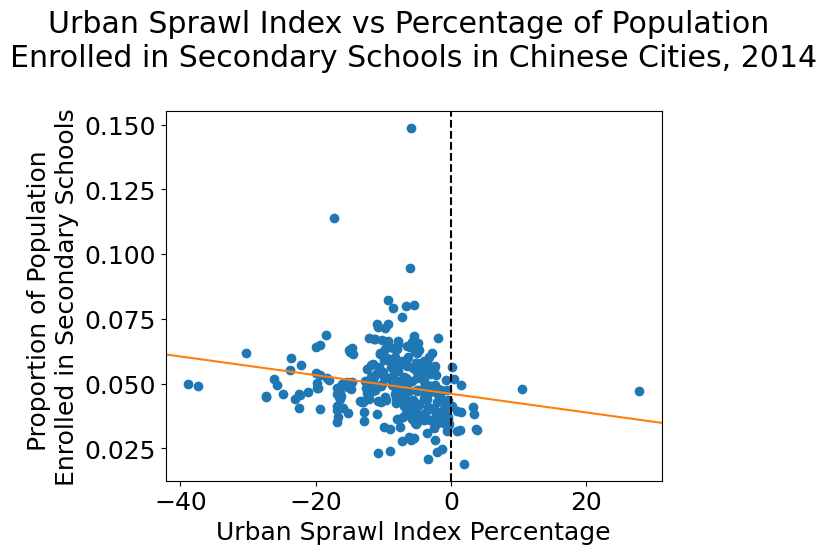

In [539]:
x1 = combined_df_2014['Urban Sprawl Index']
y = combined_df_2014["Proportion of Population Enrolled in Secondary Schools"]
plt.scatter(x1,y)
plt.title("Urban Sprawl Index vs Percentage of Population \nEnrolled in Secondary Schools in Chinese Cities, 2014",y=1.1)
plt.xlabel("Urban Sprawl Index Percentage")
plt.ylabel("Proportion of Population \nEnrolled in Secondary Schools")
plt.axvline(x=0, color='k', linestyle='--')

slope, intercept, r_value, p_value, std_err = linregress(x1, y)
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_value**2)
print("P-value: ", p_value)
print("Standard error: ", std_err)
plt.axline((0, intercept), slope=slope, color='C1')

Slope:  0.0007158114870403421
Intercept:  0.04634155647934034
R-squared:  0.12133800524022066
P-value:  1.4929401937675054e-09
Standard error:  0.00011450328364311085


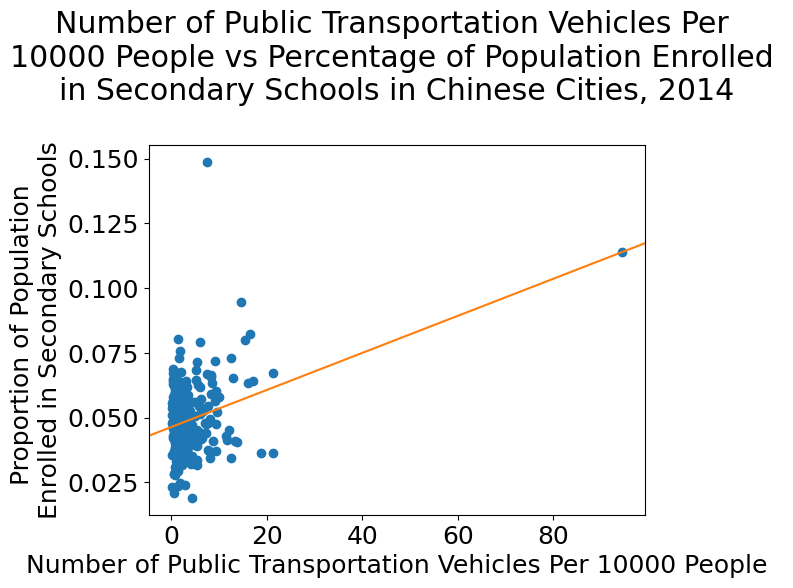

In [540]:
x2 = combined_df_2014["Number of Public Transportation Vehicles Per 10000 People"]
y = combined_df_2014["Proportion of Population Enrolled in Secondary Schools"]
plt.scatter(x2,y)

slope, intercept, r_value, p_value, std_err = linregress(x2, y)

plt.title("Number of Public Transportation Vehicles Per \n10000 People vs Percentage of Population Enrolled \nin Secondary Schools in Chinese Cities, 2014",y=1.1)
plt.xlabel("Number of Public Transportation Vehicles Per 10000 People")
plt.ylabel("Proportion of Population \nEnrolled in Secondary Schools")
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_value**2)
print("P-value: ", p_value)
print("Standard error: ", std_err)
plt.axline((0, intercept), slope=slope, color='C1')

Slope:  2.1514787453554753e-05
Intercept:  0.04424473902174743
R-squared:  0.10192323729815132
P-value:  3.571536126334366e-08
Standard error:  3.7963300906301147e-06


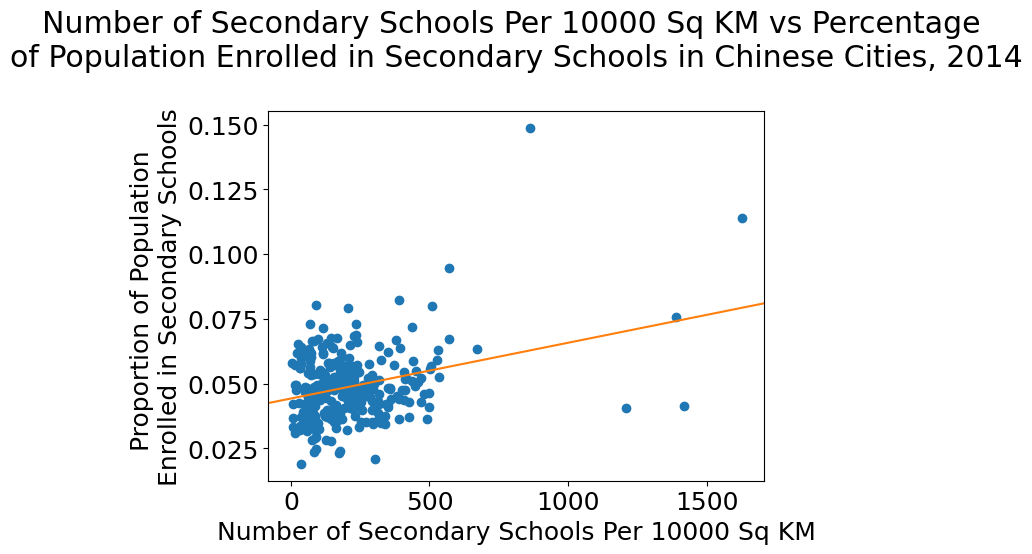

In [541]:
x3 = combined_df_2014["Number of Secondary Schools Per 10000 Sq KM"]
y = combined_df_2014["Proportion of Population Enrolled in Secondary Schools"]
plt.scatter(x3,y)

slope, intercept, r_value, p_value, std_err = linregress(x3, y)

plt.title("Number of Secondary Schools Per 10000 Sq KM vs Percentage \nof Population Enrolled in Secondary Schools in Chinese Cities, 2014",y=1.1)
plt.xlabel("Number of Secondary Schools Per 10000 Sq KM")
plt.ylabel("Proportion of Population \nEnrolled in Secondary Schools")
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_value**2)
print("P-value: ", p_value)
print("Standard error: ", std_err)
plt.axline((0, intercept), slope=slope, color='C1')

In [542]:
from sklearn.preprocessing import StandardScaler
x = combined_df_2014.loc[:,["Number of Public Transportation Vehicles Per 10000 People", "Urban Sprawl Index", "Number of Secondary Schools Per 10000 Sq KM"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 2.31000599e+00,  4.94308140e-02,  1.36918456e+00],
       [ 2.69047176e+00,  4.37900818e-01,  8.70040282e-01],
       [ 1.49328992e+00,  1.89480001e-01,  1.39850912e+00],
       [ 1.21417663e+00,  8.12035292e-01,  1.03842410e+00],
       [ 1.56370420e-01, -6.96322657e-01,  3.67338582e-01],
       [-5.62658357e-02, -1.44995057e-02,  1.31063247e-01],
       [-1.31632394e-01,  2.44331958e-01, -5.84514643e-02],
       [-1.35821352e-01, -1.23162417e+00,  4.97732384e-01],
       [-1.79744662e-01, -1.16866647e+00,  1.57876631e-02],
       [-2.54717509e-01, -2.38930385e-01, -9.63734764e-02],
       [-8.96598678e-02,  3.45207173e-01, -8.62134945e-01],
       [-2.88994035e-01, -3.03633620e-02, -9.36929240e-01],
       [-2.50870541e-01, -1.57961213e+00,  2.49414523e-02],
       [-3.31245867e-01, -1.14523831e+00,  2.73409255e-01],
       [-4.02822862e-01, -4.84885163e-01, -9.19841300e-02],
       [ 7.14897472e-01, -2.63527207e-01,  5.41923017e-01],
       [-1.76097566e-01, -1.18904165e-01

In [543]:
import statsmodels.api as sm
x_cons = sm.add_constant(X_scaled)
model = sm.OLS(y, x_cons).fit()
result = model.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              OLS Regression Results                                              
==================================================================================================================
Dep. Variable:     Proportion of Population Enrolled in Secondary Schools   R-squared:                       0.183
Model:                                                                OLS   Adj. R-squared:                  0.174
Method:                                                     Least Squares   F-statistic:                     20.93
Date:                                                    Fri, 05 May 2023   Prob (F-statistic):           2.87e-12
Time:                                                            22:24:23   Log-Likelihood:                 852.13
No. Observations:                                                     285   AIC:                            -1696.
Df Residuals:                                                         281   BIC:                            -1682.
Df Model:                                                               3                                         
Covariance Type:                                                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0489      0.001     67.409      0.000       0.048       0.050
x1             0.0036      0.001      4.143      0.000       0.002       0.005
x2            -0.0026      0.001     -3.541      0.000      -0.004      -0.001
x3             0.0022      0.001      2.606      0.010       0.001       0.004
==============================================================================
Omnibus:                      134.486   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1325.886
Skew:                           1.648   Prob(JB):                    1.22e-288
Kurtosis:                      13.040   Cond. No.                         1.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [544]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)
def onezero(n):
    if n > 0.03:
        return 0
    return 1
Y_train = map(onezero, Y_train)
Y_train = np.array(list(Y_train))
Y_test = map(onezero, Y_test)
Y_test = np.array(list(Y_test))

In [545]:
y.quantile(0.1)

0.03513234712849964

In [546]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)
def onezero(n):
    if n > 0.035:
        return 0
    return 1
Y_train = map(onezero, Y_train)
Y_train = np.array(list(Y_train))
Y_test = map(onezero, Y_test)
Y_test = np.array(list(Y_test))
model = Sequential()
# double duty: defining the input or visible layer and the first hidden layer
model.add(Dense(12, input_dim=3, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(12, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=1000, batch_size=50)
model.evaluate(X_test, Y_test)

Epoch 1/1000
4/4 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.9045
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9045
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0864 - accuracy: 0.9045
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9045
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9045
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9045
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9045
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9045
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9045
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9045
Epoch 11/1000
4/4 [

[0.09880669414997101, 0.895348846912384]

In [547]:
predictions = model.predict(x)
np.min(predictions), np.max(predictions)

9/9 [==============================] - 0s 2ms/step


(-0.09069334, 0.7022274)

In [555]:
below_thresh = pd.DataFrame(predictions).set_index(combined_df_2014.index)
below_thresh = below_thresh.loc[below_thresh[0] > 0.6]
below_thresh

,0
REGION,
Baicheng City,0.615978
Hegang City,0.617987
Shuangyashan City,0.626788
Yichun City,0.702227
Heihe City,0.669637


In [549]:
future_df = pd.DataFrame()
for df in [pop, land, transport, nat_gr, land, num_schools, num_students]:
    df_lst = []
    for i in range(df.shape[0]):
        x4 = df.columns.astype(int)
        x2_cons = sm.add_constant(x4)
        y2 = list(df.iloc[i,])
        model2 = sm.OLS(y2, x2_cons, missing='drop').fit()
        new_x = model2.params[1] * 2025 + model2.params[0]
        df_lst.append(new_x)
    future_df[df.name] = df_lst
future_df = future_df.set_index(pop.index)
future_df

,pop,land,transport,nat_gr,num_schools,num_students
REGION,,,,,,
Districts under Beijing,1506.415918,1.948272,29667.546667,6.696978,658.258462,42.459036
Beijing,1477.055631,1.615495,40066.376623,4.305685,597.066667,38.229251
Districts under Tianjin,1139.803631,1.304542,15328.712821,2.446457,474.240000,43.385938
Tianjin,1135.686000,1.190938,16159.463203,0.841416,432.900513,41.654400
Shijiazhuang City,1062.219036,1.421751,9224.774118,9.999261,287.544615,45.611897
...,...,...,...,...,...,...
Wuzhong City,160.654070,1.518835,723.181176,12.905058,20.282319,9.980554
Guyuan City,148.554871,1.143189,226.050000,8.234066,39.561654,8.747910
Zhongwei City,131.892496,1.792398,517.640000,7.735029,53.916753,8.008531


In [550]:
future_2025 = pd.DataFrame({'Population (10000 people)': future_df['pop'], 
                                 "Number of Public Transportation Vehicles Per 10000 People": future_df.transport / future_df['pop'], 
                                 "Natural Growth Rate": future_df.nat_gr, "Land Area (10000 sq km)": future_df.land, 
                                 "Land Area Growth Rate": 10*((future_df['land'] / land['2015'])-1), 
                                 'Number of Secondary Schools Per 10000 Sq KM': future_df.num_schools / future_df.land, 
                                 'Proportion of Population Enrolled in Secondary Schools': future_df.num_students / future_df['pop']})

future_2025['Urban Sprawl Index'] = future_2025["Land Area Growth Rate"] - future_2025["Natural Growth Rate"]
future_2025 = future_2025[future_2025.index.isin(combined_df_2014.index)]
future_2025.head()

,Population (10000 people),Number of Public Transportation Vehicles Per 10000 People,Natural Growth Rate,Land Area (10000 sq km),Land Area Growth Rate,Number of Secondary Schools Per 10000 Sq KM,Proportion of Population Enrolled in Secondary Schools,Urban Sprawl Index
REGION,,,,,,,,
Districts under Beijing,1506.415918,19.694127,6.696978,1.948272,1.871747,337.867789,0.028185,-4.825232
Beijing,1477.055631,27.125841,4.305685,1.615495,-0.156024,369.587476,0.025882,-4.461710
Districts under Tianjin,1139.803631,13.448556,2.446457,1.304542,0.946895,363.530016,0.038064,-1.499561
Tianjin,1135.686000,14.228813,0.841416,1.190938,-0.006390,363.495278,0.036678,-0.847807
Shijiazhuang City,1062.219036,8.684437,9.999261,1.421751,0.889638,202.246795,0.042940,-9.109623


In [553]:
x_future_test = future_2025.loc[:,["Number of Public Transportation Vehicles Per 10000 People", "Urban Sprawl Index", "Number of Secondary Schools Per 10000 Sq KM"]]
predictions2 = model.predict(x_future_test)
below_thresh2 = pd.DataFrame(predictions2).set_index(future_2025.index)
below_thresh2 = below_thresh2.loc[below_thresh2[0] > 0.6]
below_thresh2

9/9 [==============================] - 0s 2ms/step


,0
REGION,
Tongliao City,0.728932
Hulunbeir City,0.726705
Ulanchabu City,0.690240
Baicheng City,0.613911
Qiqihar City,0.600645
Jixi City,0.619156
Hegang City,0.647643
Shuangyashan City,0.606462
Yichun City,0.650546


In [554]:
future_2025.loc[below_thresh2.index,]

,Population (10000 people),Number of Public Transportation Vehicles Per 10000 People,Natural Growth Rate,Land Area (10000 sq km),Land Area Growth Rate,Number of Secondary Schools Per 10000 Sq KM,Proportion of Population Enrolled in Secondary Schools,Urban Sprawl Index
REGION,,,,,,,,
Tongliao City,323.586957,1.912879,-1.184858,7.069989,1.856628,14.769185,0.054262,3.041485
Hulunbeir City,252.593884,1.884222,-2.155789,25.722146,0.175825,3.566213,0.011757,2.331615
Ulanchabu City,274.894810,1.726974,-1.589301,5.480220,0.055449,8.451421,0.020091,1.644750
Baicheng City,190.146379,0.595226,-5.666065,2.579790,0.015102,41.955710,0.034034,5.681167
Qiqihar City,534.458154,3.227912,-5.898558,4.253929,0.016552,41.259953,0.017437,5.915110
Jixi City,168.412421,9.196626,-5.527943,2.256478,0.014991,28.448697,0.034191,5.542933
Hegang City,98.235313,6.750928,-7.965072,1.467371,-0.003603,16.756288,0.021782,7.961469
Shuangyashan City,141.615272,8.430709,-10.573584,2.308175,0.204585,22.620601,0.025223,10.778169
Yichun City,109.730718,8.353939,-9.913862,3.274121,-0.017924,9.333803,0.018915,9.895938
